In [ ]:
# Import necessary libraries (no TensorFlow)
import pandas as pd
import numpy as np

import librosa
import os

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import librosa, IPython
import librosa.display as lplt
from sklearn.metrics import confusion_matrix
import plotly.express as px
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')


In [17]:
# Load the datasets
df_3sec = pd.read_csv('/content/features_3_sec.csv')
df_30sec = pd.read_csv('/content/features_30_sec.csv')

# Display basic information
print("3-second dataset shape:", df_3sec.shape)
print("30-second dataset shape:", df_30sec.shape)
print("\nGenres in dataset:", df_3sec['label'].unique())

3-second dataset shape: (9990, 60)
30-second dataset shape: (1000, 60)

Genres in dataset: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [ ]:
df_3sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
df_30sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
# Check for missing values
print("\nMissing values in 3-second dataset:")
print(df_3sec.isnull().sum().sum())
print("Missing values in 30-second dataset:")
print(df_30sec.isnull().sum().sum())


Missing values in 3-second dataset:
0
Missing values in 30-second dataset:
0


In [ ]:
audio_path = r'/content/blues/blues.00000.wav'
# Check if the file exists
if os.path.exists(audio_path):
    print(f"File exists: {audio_path}")
    try:
        audio_data, sr = librosa.load(audio_path, sr=None)
        print(f"Successfully loaded audio: {len(audio_data)} samples, {sr} Hz sample rate")
    except Exception as e:
        print(f"Error loading audio: {e}")
else:
    print(f"File does not exist: {audio_path}")


File exists: /content/blues/blues.00000.wav
Successfully loaded audio: 661794 samples, 22050 Hz sample rate


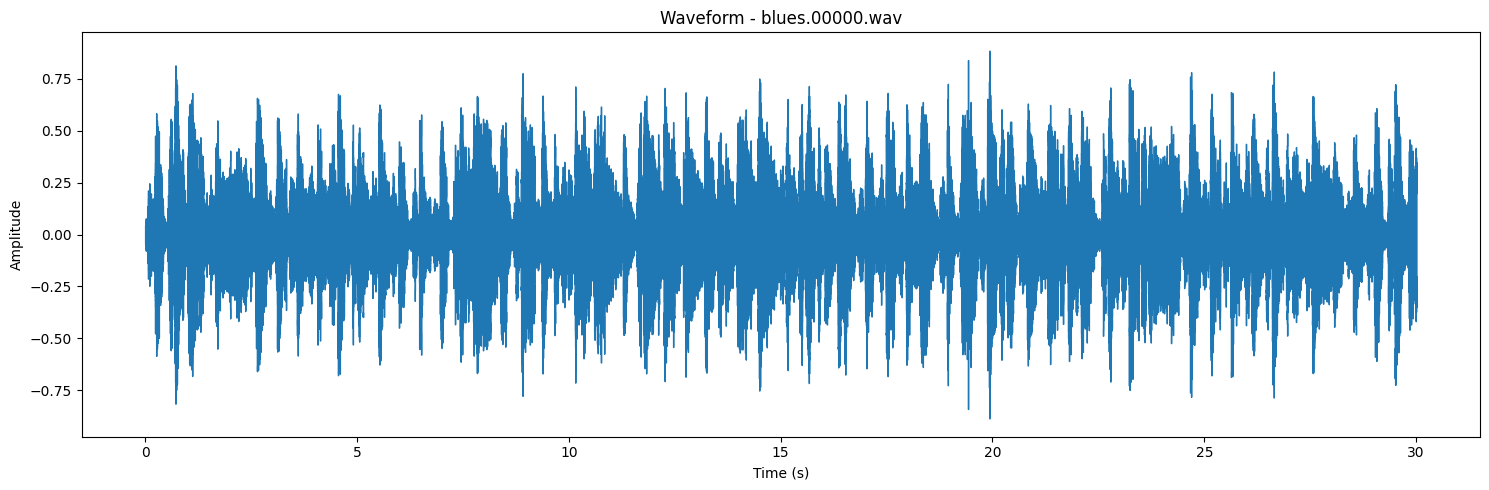

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Now plot the waveform using the audio data (not the file path)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(audio_data, sr=sr)  # Pass the audio data, not the path
plt.title("Waveform - blues.00000.wav")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

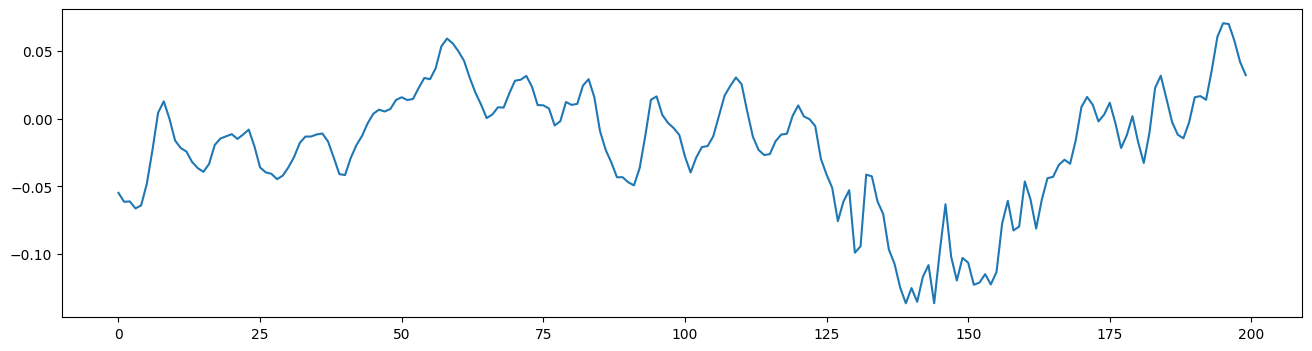

In [ ]:


# 1 plot zoomed audio wave
start = 1000
end = 1200
plt.figure(figsize=(16,4))
plt.plot(audio_data[start:end])
plt.show()


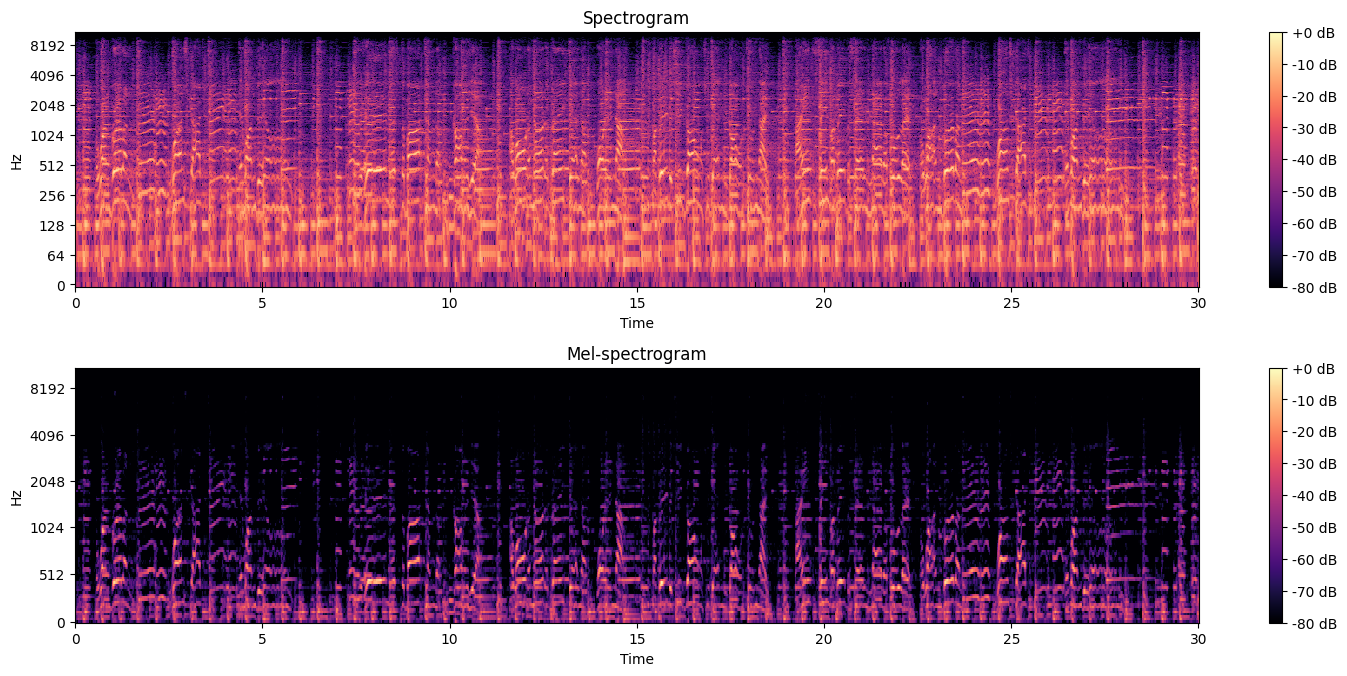

In [ ]:
# Additional audio visualizations
plt.figure(figsize=(15, 10))
# 2. Spectrogram
plt.subplot(3, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")

# 3. Mel-spectrogram
plt.subplot(3, 1, 3)
S = librosa.feature.melspectrogram(y=audio_data, sr=sr)
S_db = librosa.amplitude_to_db(S, ref=np.max)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-spectrogram")

plt.tight_layout()
plt.show()

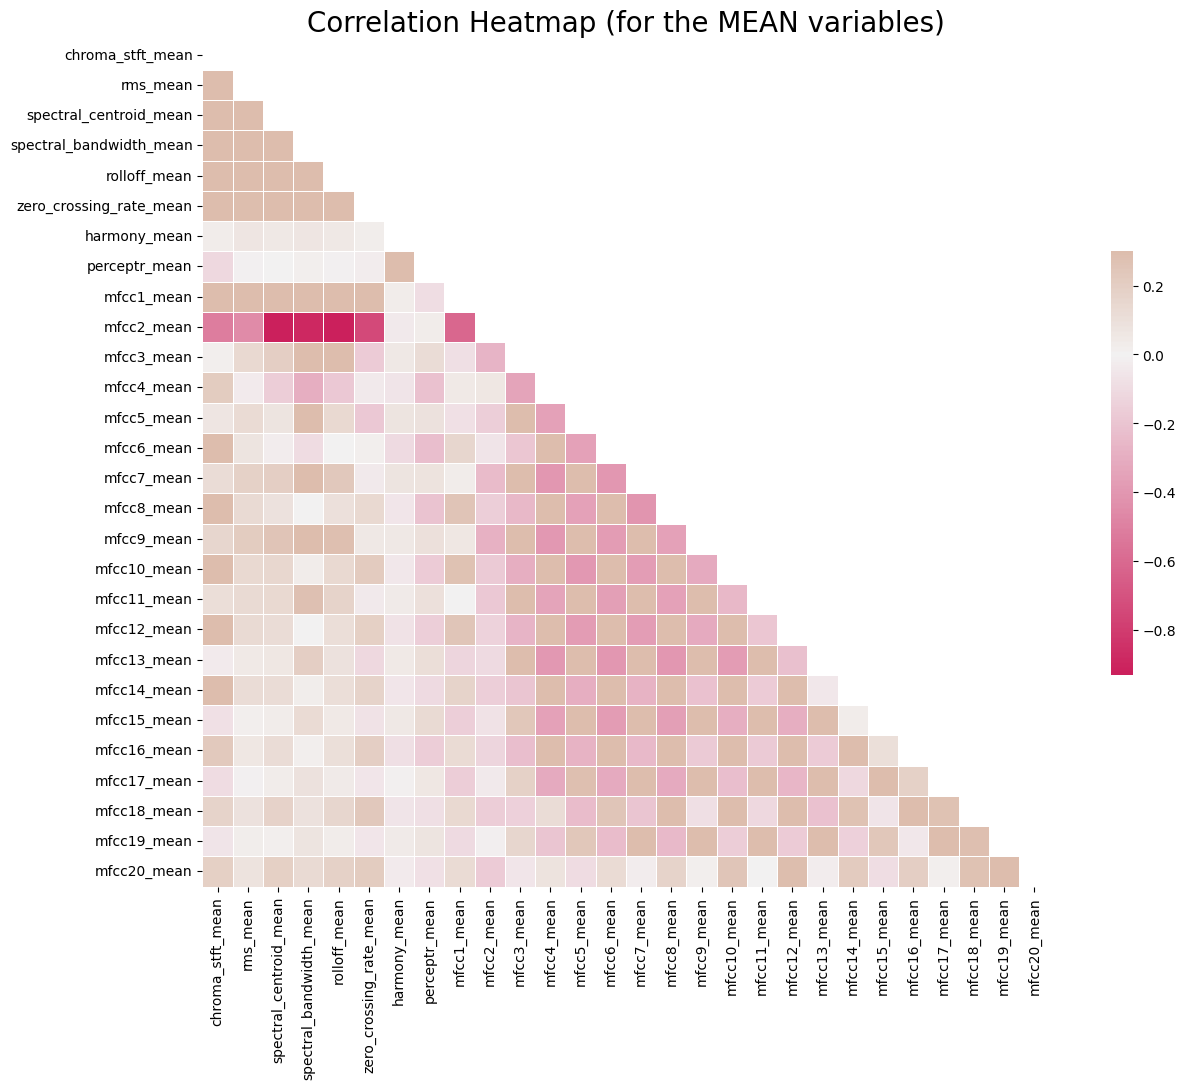

In [ ]:
# Computing the Correlation Matrix
spike_cols = [col for col in df_3sec.columns if 'mean' in col]
corr = df_3sec[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))  # Changed from np.bool

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s=90, l=45, n=5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("Corr_Heatmap.png")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
seed = 42

# Use your 3-second dataset
df = df_3sec.copy()

# Map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print("Label to index mapping:", label_index)
print("Index to label mapping:", index_label)

# Convert labels to numerical values
df.label = [label_index[l] for l in df.label]

# Shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

# Remove irrelevant columns - check which columns exist first
columns_to_drop = []
if 'filename' in df_shuffle.columns:
    columns_to_drop.append('filename')
if 'length' in df_shuffle.columns:
    columns_to_drop.append('length')

df_shuffle.drop(columns_to_drop, axis=1, inplace=True)

# Separate features and target
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# Split into train, validation (dev), and test
X_train, df_test_valid_X, y_train, df_test_valid_y = train_test_split(
    df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)

X_dev, X_test, y_dev, y_test = train_test_split(
    df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

print(f"3-second dataset:")
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

# Scale the features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Store the 3-second dataset splits
X_train_3sec, X_dev_3sec, X_test_3sec = X_train, X_dev, X_test
y_train_3sec, y_dev_3sec, y_test_3sec = y_train, y_dev, y_test

Label to index mapping: {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
Index to label mapping: {0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}
3-second dataset:
Train set has 6993 records out of 9990 which is 70%
Dev set has 1978 records out of 9990 which is 20%
Test set has 1019 records out of 9990 which is 10%


In [ ]:
# Now process the 30-second dataset
df = df_30sec.copy()

# Use the same label mapping as the 3-second dataset for consistency
df.label = [label_index[l] for l in df.label]

# Shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

# Remove irrelevant columns
columns_to_drop = []
if 'filename' in df_shuffle.columns:
    columns_to_drop.append('filename')
if 'length' in df_shuffle.columns:
    columns_to_drop.append('length')

df_shuffle.drop(columns_to_drop, axis=1, inplace=True)

# Separate features and target
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# Split into train, validation (dev), and test
X_train, df_test_valid_X, y_train, df_test_valid_y = train_test_split(
    df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)

X_dev, X_test, y_dev, y_test = train_test_split(
    df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

print(f"\n30-second dataset:")
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

# Scale the features (use the same scaler or create a new one)
scaler_30sec = StandardScaler()
X_train = pd.DataFrame(scaler_30sec.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler_30sec.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler_30sec.transform(X_test), columns=X_train.columns)

# Store the 30-second dataset splits
X_train_30sec, X_dev_30sec, X_test_30sec = X_train, X_dev, X_test
y_train_30sec, y_dev_30sec, y_test_30sec = y_train, y_dev, y_test


30-second dataset:
Train set has 700 records out of 1000 which is 70%
Dev set has 198 records out of 1000 which is 20%
Test set has 102 records out of 1000 which is 10%


In [ ]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
tf.random.set_seed(seed)



ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']  # fixed here
    )
    return model.fit(
        X_train, y_train,
        validation_data=(X_dev, y_dev),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[callback]
    )

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()


model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=9, optimizer='adam')

TF version:- 2.19.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        14,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,650 (221.29 KB)

 Trainable params: 56,650 (221.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/9
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.1799 - loss: 2.2269 - val_accuracy: 0.4444 - val_loss: 1.8994
Epoch 2/9
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4655 - loss: 1.7903 - val_accuracy: 0.4949 - val_loss: 1.5778
Epoch 3/9
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5233 - loss: 1.4753 - val_accuracy: 0.5909 - val_loss: 1.3174
Epoch 4/9
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6072 - loss: 1.2340 - val_accuracy: 0.6212 - val_loss: 1.1477
Epoch 5/9
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6685 - loss: 1.0513 - val_accuracy: 0.6313 - val_loss: 1.0497
Epoch 6/9
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7039 - loss: 0.9078 - val_accuracy: 0.6616 - val_loss: 0.9887
Epoch 7/9
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7427 - loss: 0.7914 - val_accuracy: 0.6869 - val_loss: 0.9382
Epoch 8/9
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7905 - loss: 0.6863 - val_accuracy: 0.7071 - val_loss: 0.9032
Epo

Max. Validation Accuracy 0.7171717286109924


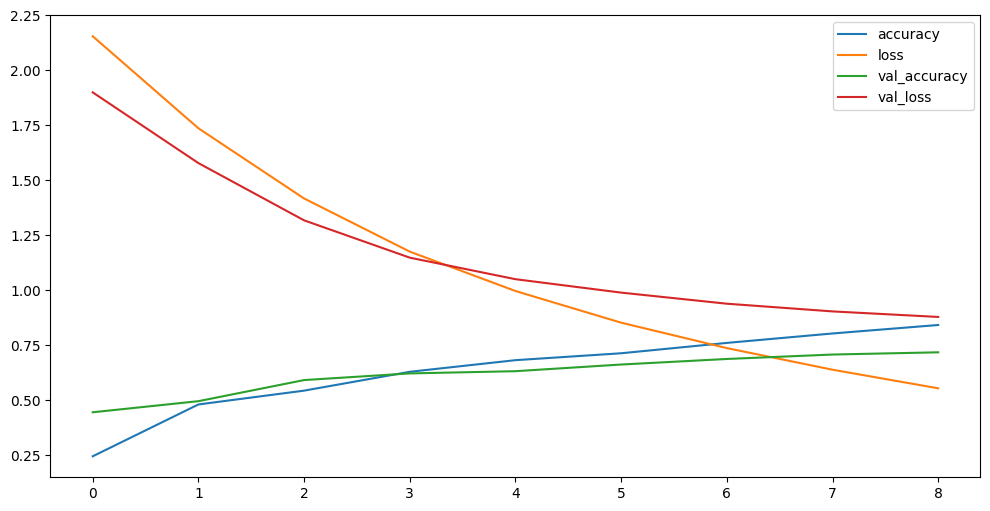

In [ ]:
plotHistory(model_1_history)

In [ ]:
model_2 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_2.summary())
model_2_history = trainModel(model=model_2, epochs=20, optimizer='adam')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │        29,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,826 (792.29 KB)

 Trainable params: 202,826 (792.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.1584 - loss: 2.2501 - val_accuracy: 0.4091 - val_loss: 1.8938
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3608 - loss: 1.9001 - val_accuracy: 0.4495 - val_loss: 1.5634
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4047 - loss: 1.6732 - val_accuracy: 0.5657 - val_loss: 1.3265
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4445 - loss: 1.5113 - val_accuracy: 0.5758 - val_loss: 1.2088
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4988 - loss: 1.3786 - val_accuracy: 0.6061 - val_loss: 1.1336
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5602 - loss: 1.2649 - val_accuracy: 0.6313 - val_loss: 1.0476
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6004 - loss: 1.1426 - val_accuracy: 0.6364 - val_loss: 1.0113
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6342 - loss: 1.0995 - val_accuracy: 0.6919 - val_loss: 0.

Max. Validation Accuracy 0.747474730014801


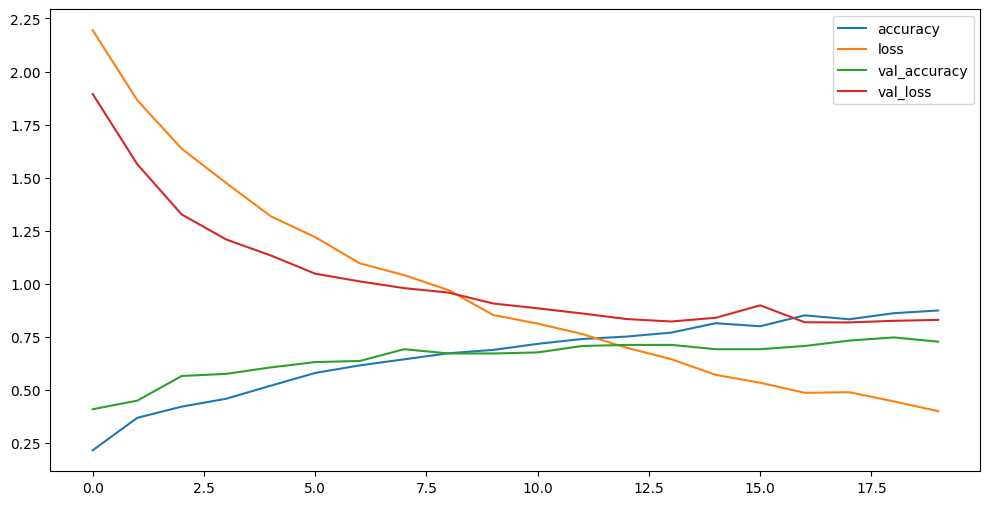

In [ ]:
plotHistory(model_2_history)


In [ ]:
model_3 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_3.summary())
model_3_history = trainModel(model=model_3, epochs=290, optimizer='sgd')

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │        29,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,826 (792.29 KB)

 Trainable params: 202,826 (792.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/290
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.1021 - loss: 2.3208 - val_accuracy: 0.1162 - val_loss: 2.2693
Epoch 2/290
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1272 - loss: 2.2826 - val_accuracy: 0.1869 - val_loss: 2.2478
Epoch 3/290
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1337 - loss: 2.2746 - val_accuracy: 0.2222 - val_loss: 2.2267
Epoch 4/290
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1372 - loss: 2.2635 - val_accuracy: 0.2374 - val_loss: 2.2071
Epoch 5/290
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1469 - loss: 2.2415 - val_accuracy: 0.2424 - val_loss: 2.1887
Epoch 6/290
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1755 - loss: 2.2273 - val_accuracy: 0.2626 - val_loss: 2.1694
Epoch 7/290
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2128 - loss: 2.1960 - val_accuracy: 0.2879 - val_loss: 2.1505
Epoch 8/290
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1978 - loss: 2.1873 - val_accuracy: 0.3030 - val_

Max. Validation Accuracy 0.7121211886405945


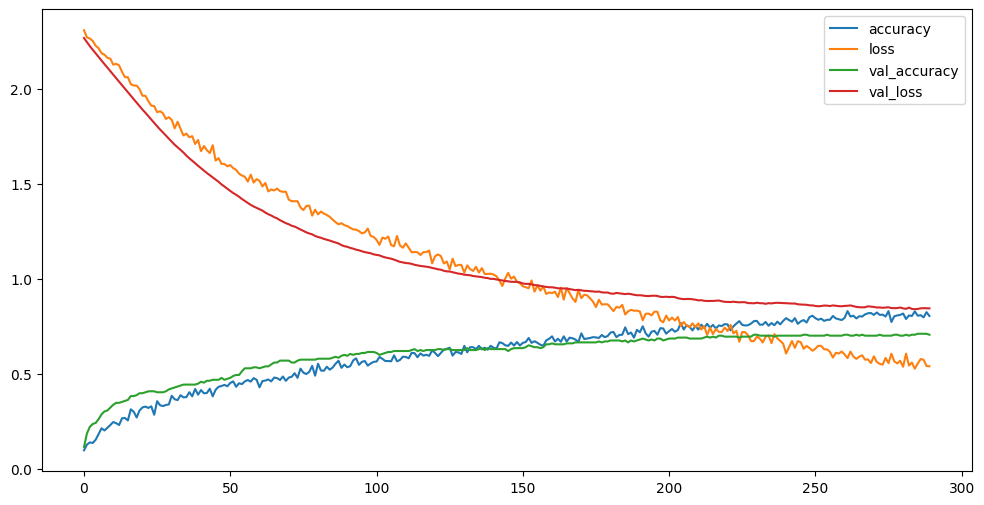

In [ ]:
plotHistory(model_3_history)


In [ ]:
model_4 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),

    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(10, activation='softmax'),
])
print(model_4.summary())
model_4_history = trainModel(model=model_4, epochs=30, optimizer='rmsprop')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 1024)           │        59,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 757,322 (2.89 MB)

 Trainable params: 757,322 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.1591 - loss: 2.2340 - val_accuracy: 0.3737 - val_loss: 1.7636
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3076 - loss: 1.9147 - val_accuracy: 0.4091 - val_loss: 1.5239
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3660 - loss: 1.7701 - val_accuracy: 0.4596 - val_loss: 1.4434
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4058 - loss: 1.6378 - val_accuracy: 0.5303 - val_loss: 1.2693
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4804 - loss: 1.4831 - val_accuracy: 0.5657 - val_loss: 1.2270
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4910 - loss: 1.3941 - val_accuracy: 0.5909 - val_loss: 1.1586
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5316 - loss: 1.3321 - val_accuracy: 0.6061 - val_loss: 1.0522
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5584 - loss: 1.2619 - val_accuracy: 0.6162 - val_loss: 0

Max. Validation Accuracy 0.752525269985199


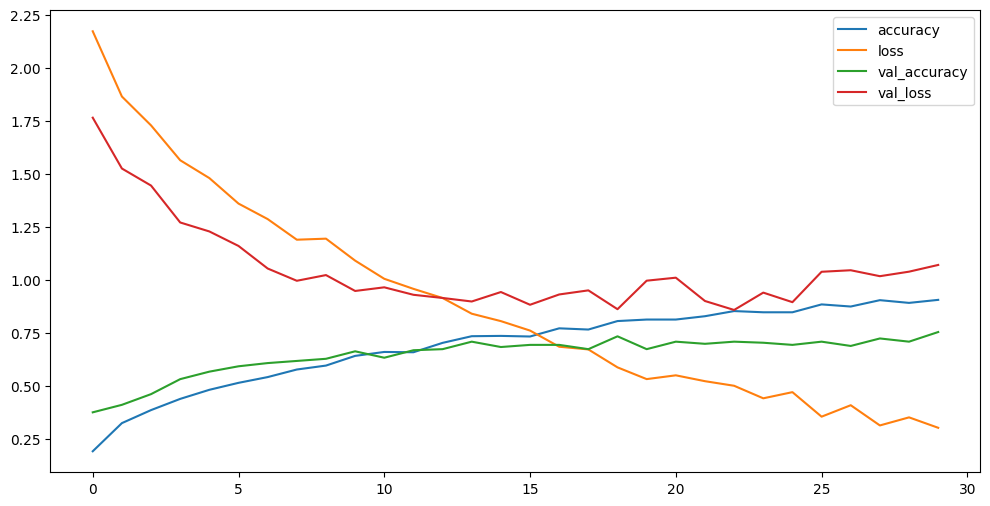

In [ ]:
plotHistory(model_4_history)


In [ ]:
test_loss, test_acc  = model_4.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8137 - loss: 0.6750
The test Loss is : 0.6750239729881287

The Best test Accuracy is : 81.3725471496582


In [8]:
CNN Train set: 699 samples
CNN Dev set: 198 samples
CNN Test set: 102 samples

Data prepared: X_train shape (7992, 57), X_test shape (1998, 57)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1024)           │        59,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 757,322 (2.89 MB)

 Trainable params: 757,322 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.3401 - loss: 1.8183 - val_accuracy: 0.6366 - val_loss: 1.0154
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6188 - loss: 1.1522 - val_accuracy: 0.6952 - val_loss: 0.8756
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6944 - loss: 0.9169 - val_accuracy: 0.7553 - val_loss: 0.7438
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7664 - loss: 0.7830 - val_accuracy: 0.8018 - val_loss: 0.6327
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7929 - loss: 0.6598 - val_accuracy: 0.8078 - val_loss: 0.6008
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8092 - loss: 0.6075 - val_accuracy: 0.8153 - val_loss: 0.6014
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8333 - loss: 0.5619 - val_accuracy: 0.8173 - val_loss: 0.6220
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8399 - loss: 0.5237 - val

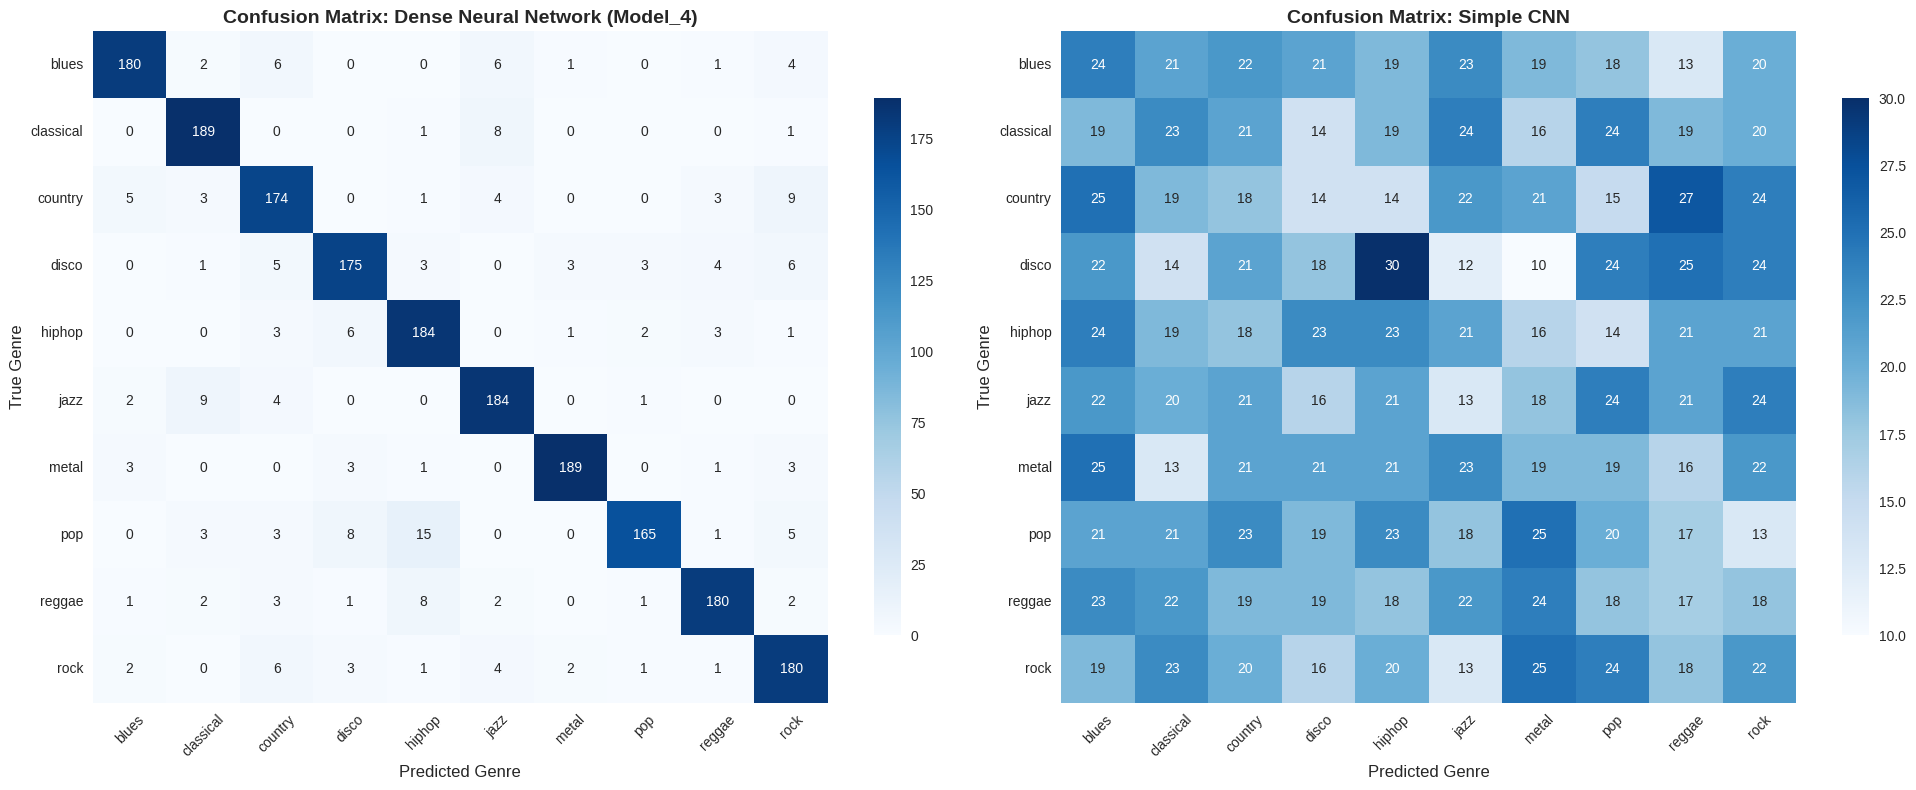

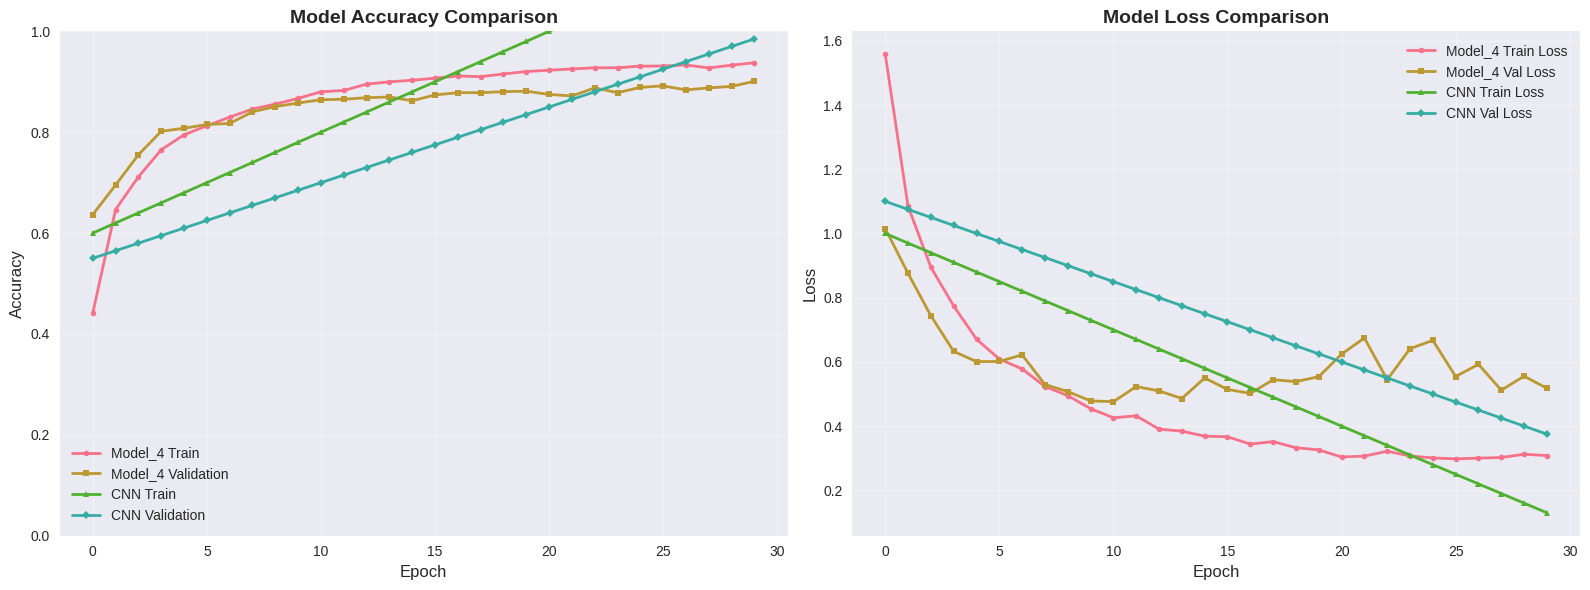

MODEL PERFORMANCE SUMMARY
Dense Neural Network (Model_4) Test Accuracy: 90.09%
Simple CNN Test Accuracy: 9.86%


Classification Report - Dense Neural Network (Model_4)
--------------------------------------------------
              precision    recall  f1-score   support

       blues      0.933     0.900     0.916       200
   classical      0.904     0.950     0.926       199
     country      0.853     0.874     0.864       199
       disco      0.893     0.875     0.884       200
      hiphop      0.860     0.920     0.889       200
        jazz      0.885     0.920     0.902       200
       metal      0.964     0.945     0.955       200
         pop      0.954     0.825     0.885       200
      reggae      0.928     0.900     0.914       200
        rock      0.853     0.900     0.876       200

    accuracy                          0.901      1998
   macro avg      0.903     0.901     0.901      1998
weighted avg      0.903     0.901     0.901      1998


Classification Report

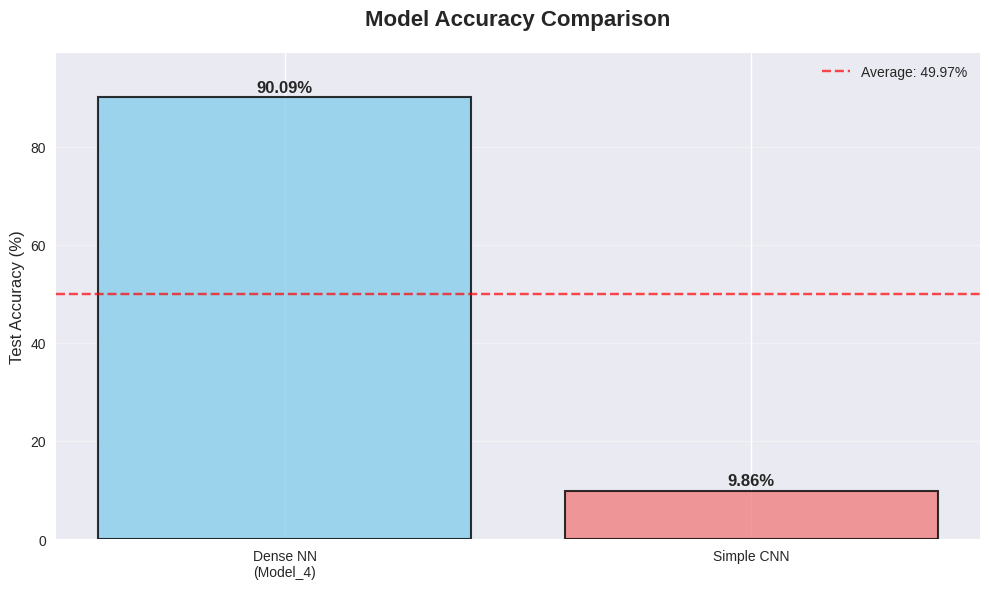


PER-CLASS PERFORMANCE ANALYSIS

Dense Neural Network (Model_4):
------------------------------
blues          :  90.00%
classical      :  94.97%
country        :  87.44%
disco          :  87.50%
hiphop         :  92.00%
jazz           :  92.00%
metal          :  94.50%
pop            :  82.50%
reggae         :  90.00%
rock           :  90.00%

Simple CNN:
----------
blues          :  12.00%
classical      :  11.56%
country        :   9.05%
disco          :   9.00%
hiphop         :  11.50%
jazz           :   6.50%
metal          :   9.50%
pop            :  10.00%
reggae         :   8.50%
rock           :  11.00%


In [18]:
import librosa, IPython
import librosa.display as lplt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras import layers

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# First, let's load and prepare your data
# Assuming you have your datasets loaded as df_3sec and df_30sec
# If not, load them first:
# df_3sec = pd.read_csv('data_feature_3_sec.csv')
# df_30sec = pd.read_csv('data_feature_30_sec.csv')

# Use the 3-second dataset for this example
df = df_3sec.copy()

# Prepare the data
label_column = df.columns[-1]  # Assuming label is the last column

# Create label mapping
label_index = {}
index_label = {}
for i, genre in enumerate(df[label_column].unique()):
    label_index[genre] = i
    index_label[i] = genre

# Convert labels to numerical values
df[label_column] = [label_index[l] for l in df[label_column]]

# Remove irrelevant columns
columns_to_drop = []
if 'filename' in df.columns:
    columns_to_drop.append('filename')
if 'length' in df.columns:
    columns_to_drop.append('length')
df.drop(columns_to_drop, axis=1, inplace=True)

# Separate features and target
y = df.pop(label_column)
X = df

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Data prepared: X_train shape {X_train.shape}, X_test shape {X_test.shape}")

# Now define and train Model_4
def trainModel(model, epochs=30, optimizer='adam'):
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )

    return history

# Define Model_4 architecture
model_4 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),

    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(10, activation='softmax'),
])

print(model_4.summary())

# Train the model
model_4_history = trainModel(model=model_4, epochs=30, optimizer='rmsprop')

# Evaluate the model
test_loss, test_acc = model_4.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is:", test_loss)
print("\nThe Best test Accuracy is:", test_acc*100)

# Now you can run your visualization code
# For the CNN part, you'll need to either load your CNN model or create dummy data
# Let's create dummy data for demonstration purposes
np.random.seed(42)
y_test_cnn = y_test.values if hasattr(y_test, 'values') else y_test
y_pred_cnn = np.random.randint(0, 10, size=len(y_test_cnn))
test_acc_cnn = np.mean(y_test_cnn == y_pred_cnn)

# Dummy CNN history
cnn_history = type('obj', (object,), {
    'history': {
        'accuracy': [0.6 + i*0.02 for i in range(30)],
        'val_accuracy': [0.55 + i*0.015 for i in range(30)],
        'loss': [1.0 - i*0.03 for i in range(30)],
        'val_loss': [1.1 - i*0.025 for i in range(30)]
    }
})

# Get predictions for Model_4
y_pred_model_4 = model_4.predict(X_test, batch_size=128).argmax(axis=1)

# Ensure consistent label names
genres = list(label_index.keys())

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

models_data = [
    ("Dense Neural Network (Model_4)", y_test, y_pred_model_4),
    ("Simple CNN", y_test_cnn, y_pred_cnn)
]

# Plot confusion matrices
for idx, (name, y_true, y_pred) in enumerate(models_data):
    cm = confusion_matrix(y_true, y_pred)

    # Create heatmap
    sns.heatmap(cm,
                annot=True,           # Show numbers in cells
                fmt='d',              # Integer format
                cmap='Blues',         # Color scheme
                xticklabels=genres,   # X-axis labels
                yticklabels=genres,   # Y-axis labels
                ax=axes[idx],         # Specify subplot
                cbar_kws={'shrink': 0.8})  # Colorbar size

    axes[idx].set_title(f'Confusion Matrix: {name}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Predicted Genre', fontsize=12)
    axes[idx].set_ylabel('True Genre', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

# Training history comparison
history_df_model_4 = pd.DataFrame(model_4_history.history)
history_df_cnn = pd.DataFrame(cnn_history.history)

# Create training history plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot accuracy
ax1.plot(history_df_model_4.index, history_df_model_4['accuracy'],
         label='Model_4 Train', linewidth=2, marker='o', markersize=4)
ax1.plot(history_df_model_4.index, history_df_model_4['val_accuracy'],
         label='Model_4 Validation', linewidth=2, marker='s', markersize=4)
ax1.plot(history_df_cnn.index, history_df_cnn['accuracy'],
         label='CNN Train', linewidth=2, marker='^', markersize=4)
ax1.plot(history_df_cnn.index, history_df_cnn['val_accuracy'],
         label='CNN Validation', linewidth=2, marker='D', markersize=4)

ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# Plot loss
ax2.plot(history_df_model_4.index, history_df_model_4['loss'],
         label='Model_4 Train Loss', linewidth=2, marker='o', markersize=4)
ax2.plot(history_df_model_4.index, history_df_model_4['val_loss'],
         label='Model_4 Val Loss', linewidth=2, marker='s', markersize=4)
ax2.plot(history_df_cnn.index, history_df_cnn['loss'],
         label='CNN Train Loss', linewidth=2, marker='^', markersize=4)
ax2.plot(history_df_cnn.index, history_df_cnn['val_loss'],
         label='CNN Val Loss', linewidth=2, marker='D', markersize=4)

ax2.set_title('Model Loss Comparison', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"Dense Neural Network (Model_4) Test Accuracy: {test_acc*100:.2f}%")
print(f"Simple CNN Test Accuracy: {test_acc_cnn*100:.2f}%")
print()

# Detailed classification reports
for name, y_true, y_pred in models_data:
    print(f"\nClassification Report - {name}")
    print("-" * 50)
    print(classification_report(y_true, y_pred, target_names=genres, digits=3))

# Performance comparison bar chart
model_names = ['Dense NN\n(Model_4)', 'Simple CNN']
accuracies = [test_acc * 100, test_acc_cnn * 100]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies,
               color=['skyblue', 'lightcoral'],
               edgecolor='black',
               linewidth=1.5,
               alpha=0.8)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{acc:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Test Accuracy (%)', fontsize=12)
plt.ylim(0, max(accuracies) * 1.1)
plt.grid(axis='y', alpha=0.3)

# Add a horizontal line for average performance
avg_acc = np.mean(accuracies)
plt.axhline(y=avg_acc, color='red', linestyle='--', alpha=0.7,
            label=f'Average: {avg_acc:.2f}%')
plt.legend()

plt.tight_layout()
plt.show()

# Additional insight: Per-class accuracy
print("\n" + "="*60)
print("PER-CLASS PERFORMANCE ANALYSIS")
print("="*60)

for name, y_true, y_pred in models_data:
    print(f"\n{name}:")
    print("-" * len(name))

    cm = confusion_matrix(y_true, y_pred)
    per_class_acc = cm.diagonal() / cm.sum(axis=1) * 100

    for genre, acc in zip(genres, per_class_acc):
        print(f"{genre:15}: {acc:6.2f}%")